In [ ]:
!mkdir -p ./kaggle
!cp kaggle.json ./kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:16<00:00, 131MB/s]
100% 1.06G/1.06G [00:16<00:00, 69.1MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [ ]:
os.listdir('/content/dogs_vs_cats/test/cats')

['cat.4736.jpg',
 'cat.2406.jpg',
 'cat.6343.jpg',
 'cat.1973.jpg',
 'cat.8264.jpg',
 'cat.4221.jpg',
 'cat.10654.jpg',
 'cat.3811.jpg',
 'cat.2601.jpg',
 'cat.6047.jpg',
 'cat.10114.jpg',
 'cat.1270.jpg',
 'cat.1648.jpg',
 'cat.9107.jpg',
 'cat.2346.jpg',
 'cat.6661.jpg',
 'cat.2168.jpg',
 'cat.325.jpg',
 'cat.7045.jpg',
 'cat.5965.jpg',
 'cat.3621.jpg',
 'cat.3476.jpg',
 'cat.2533.jpg',
 'cat.4478.jpg',
 'cat.5488.jpg',
 'cat.7105.jpg',
 'cat.6036.jpg',
 'cat.5931.jpg',
 'cat.2101.jpg',
 'cat.11656.jpg',
 'cat.4155.jpg',
 'cat.2636.jpg',
 'cat.8732.jpg',
 'cat.11122.jpg',
 'cat.3242.jpg',
 'cat.5969.jpg',
 'cat.4307.jpg',
 'cat.2030.jpg',
 'cat.377.jpg',
 'cat.6250.jpg',
 'cat.6077.jpg',
 'cat.703.jpg',
 'cat.5096.jpg',
 'cat.9340.jpg',
 'cat.7349.jpg',
 'cat.9846.jpg',
 'cat.9793.jpg',
 'cat.3364.jpg',
 'cat.1118.jpg',
 'cat.8811.jpg',
 'cat.1735.jpg',
 'cat.5331.jpg',
 'cat.7869.jpg',
 'cat.1995.jpg',
 'cat.1533.jpg',
 'cat.10416.jpg',
 'cat.9661.jpg',
 'cat.9837.jpg',
 'cat.4614.j

In [ ]:
random.sample(os.listdir('/content/dogs_vs_cats/test/cats'), 5)

['cat.4064.jpg',
 'cat.8389.jpg',
 'cat.176.jpg',
 'cat.4277.jpg',
 'cat.10340.jpg']

In [ ]:
os.path.join('/content/dogs_vs_cats/test/cats', 'cat.10.jpg')

'/content/dogs_vs_cats/test/cats/cat.10.jpg'

In [ ]:
def plot_images_from_directory(directory,class_animal, num_images):
  image_filenames = os.listdir(directory)
  if len(image_filenames) < num_images:
    print(f"Only found {len(image_filenames)} images in the {directory}, displaying them all.")
    num_images = len(image_filenames)
  random_images = random.sample(image_filenames, num_images)

  fig, axes = plt.subplots(3, 3, figsize=(8, 8))
  axes = axes.ravel()

  for i, image_file in enumerate(random_images):
    image_path = os.path.join(directory, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"{class_animal}")
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()


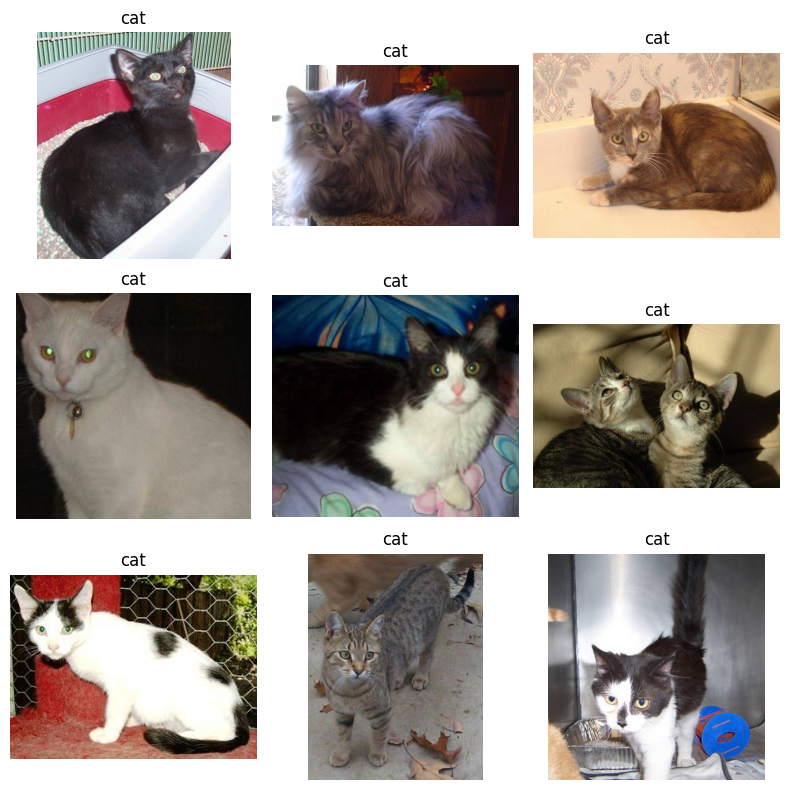

In [ ]:
cat_directory = '/content/dogs_vs_cats/train/cats'
dog_directory = '/content/dogs_vs_cats/train/dogs'
plot_images_from_directory(cat_directory, 'cat',9)

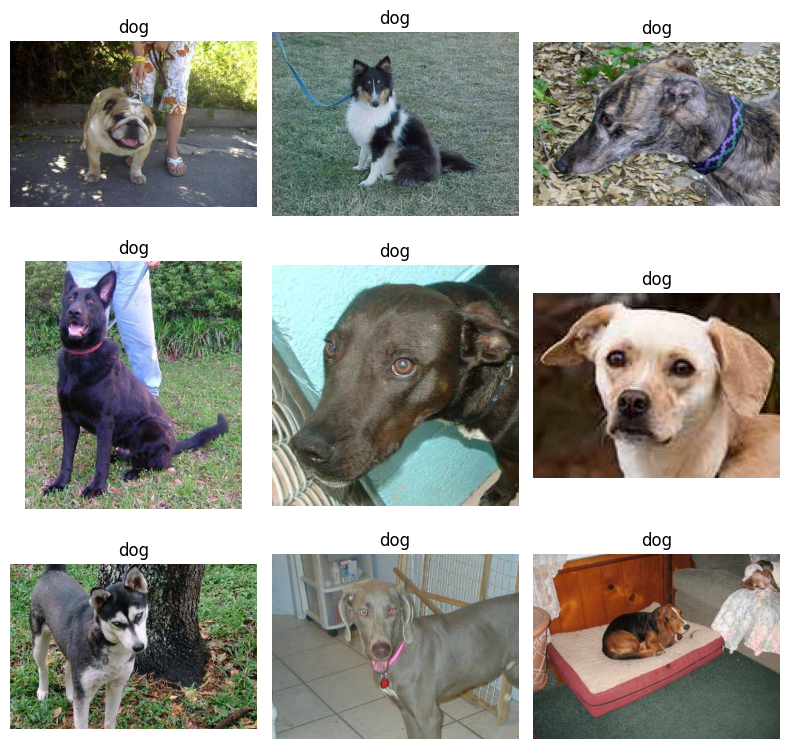

In [ ]:
plot_images_from_directory(dog_directory, 'dog',9)

In [ ]:
cat_images = os.listdir('/content/dogs_vs_cats/train/cats')
dog_images = os.listdir('/content/dogs_vs_cats/train/dogs')

print(f"Number of cat images: {len(cat_images)}")
print(f"Number of dog images: {len(dog_images)}")

classes_animals = ['Cats','Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

Number of cat images: 10000
Number of dog images: 10000
[10000, 10000]


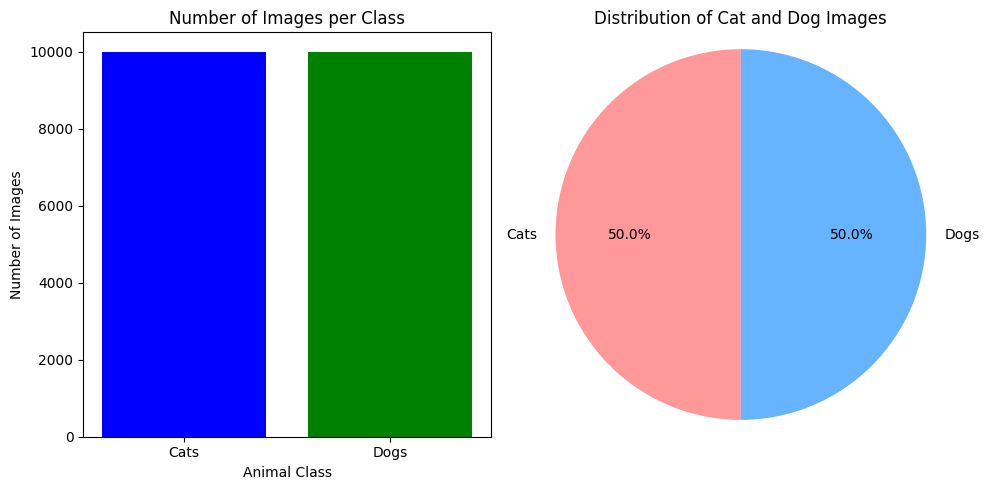

In [ ]:
from itertools import starmap
# Creating both a bar chart and a pie chart side by side in a single figure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(classes_animals, count, color=['blue', 'green'])
ax1.set_xlabel('Animal Class')
ax1.set_ylabel('Number of Images')
ax1.set_title('Number of Images per Class')

colors = ['#ff9999','#66b3ff']
ax2.pie(count, labels=classes_animals, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.axis('equal')
ax2.set_title('Distribution of Cat and Dog Images')

plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2
import imghdr

image_exts = ['jpeg','jpg', 'png']

data_dir = '/content/dogs_vs_cats'

for root, dirs, files in os.walk(data_dir):
  print(root,dirs,files)
  for file in files:
    file_path = os.path.join(root, file)

    try:
      file_type = imghdr.what(file_path)
      if file_type not in image_exts:
        os.remove(file_path)
      else:
        img = cv2.imread(file_path)

    except Exception as e:
      os.remove(file_path)

/content/dogs_vs_cats ['train', 'test'] []
/content/dogs_vs_cats/train ['dogs', 'cats'] []
/content/dogs_vs_cats/train/dogs [] ['dog.12100.jpg', 'dog.6602.jpg', 'dog.6273.jpg', 'dog.9977.jpg', 'dog.2526.jpg', 'dog.10301.jpg', 'dog.8637.jpg', 'dog.7521.jpg', 'dog.403.jpg', 'dog.939.jpg', 'dog.10617.jpg', 'dog.6158.jpg', 'dog.3393.jpg', 'dog.12412.jpg', 'dog.11124.jpg', 'dog.8731.jpg', 'dog.7891.jpg', 'dog.3958.jpg', 'dog.6646.jpg', 'dog.6077.jpg', 'dog.17.jpg', 'dog.804.jpg', 'dog.6553.jpg', 'dog.6412.jpg', 'dog.5895.jpg', 'dog.11545.jpg', 'dog.6188.jpg', 'dog.11014.jpg', 'dog.8703.jpg', 'dog.12169.jpg', 'dog.5694.jpg', 'dog.49.jpg', 'dog.2425.jpg', 'dog.1299.jpg', 'dog.6516.jpg', 'dog.1990.jpg', 'dog.630.jpg', 'dog.5296.jpg', 'dog.2532.jpg', 'dog.2293.jpg', 'dog.7223.jpg', 'dog.3206.jpg', 'dog.8259.jpg', 'dog.7125.jpg', 'dog.5168.jpg', 'dog.8793.jpg', 'dog.1261.jpg', 'dog.715.jpg', 'dog.4515.jpg', 'dog.1824.jpg', 'dog.3480.jpg', 'dog.6585.jpg', 'dog.4684.jpg', 'dog.6151.jpg', 'dog.8028

Loading Shapes and Channels using various methods


In [ ]:
import numpy as np
from PIL import Image

def image_to_array(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

array([[[  9,   8,   4],
        [ 10,  11,   6],
        [ 13,  13,  11],
        ...,
        [160, 162, 183],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 17,  13,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 180],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 17,  12,   8],
        [ 17,  13,  10],
        [ 17,  16,  14],
        ...,
        [155, 157, 178],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 111, 101],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 112, 102],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 108,  98],
        [125, 109,  96],
        [125, 109,  96]]], dtype=uint8)
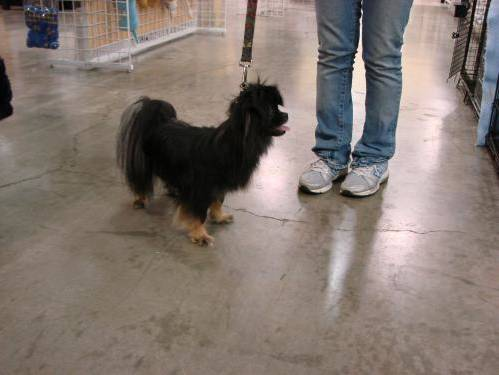

In [ ]:
image_to_array('/content/dogs_vs_cats/train/dogs/dog.1000.jpg')

Using CV2

In [ ]:
image = '/content/dogs_vs_cats/train/dogs/dog.1000.jpg'
image_array = cv2.imread(image)
if image_array is not None:
    print(image_array)
else:
    print("couldn't load.")

[[[  4   8   9]
  [  6  11  10]
  [ 11  13  13]
  ...
  [183 162 160]
  [184 161 159]
  [183 160 158]]

 [[ 10  13  17]
  [ 11  15  16]
  [ 15  17  17]
  ...
  [180 159 157]
  [181 158 156]
  [180 157 155]]

 [[  8  12  17]
  [ 10  13  17]
  [ 14  16  17]
  ...
  [178 157 155]
  [179 156 154]
  [178 155 153]]

 ...

 [[ 88  95 110]
  [ 89  96 111]
  [ 90  97 112]
  ...
  [101 111 128]
  [ 99 112 128]
  [ 99 112 128]]

 [[ 88  95 110]
  [ 87  94 109]
  [ 88  95 110]
  ...
  [102 112 129]
  [100 113 129]
  [100 113 129]]

 [[ 91  98 113]
  [ 88  95 110]
  [ 87  94 109]
  ...
  [ 98 108 125]
  [ 96 109 125]
  [ 96 109 125]]]


# Using Python

In [ ]:
img_pil = Image.open('/content/dogs_vs_cats/train/dogs/dog.1000.jpg')
img_array = np.array(img_pil)
print(img_array)
print(img_array.shape)

[[[  9   8   4]
  [ 10  11   6]
  [ 13  13  11]
  ...
  [160 162 183]
  [159 161 184]
  [158 160 183]]

 [[ 17  13  10]
  [ 16  15  11]
  [ 17  17  15]
  ...
  [157 159 180]
  [156 158 181]
  [155 157 180]]

 [[ 17  12   8]
  [ 17  13  10]
  [ 17  16  14]
  ...
  [155 157 178]
  [154 156 179]
  [153 155 178]]

 ...

 [[110  95  88]
  [111  96  89]
  [112  97  90]
  ...
  [128 111 101]
  [128 112  99]
  [128 112  99]]

 [[110  95  88]
  [109  94  87]
  [110  95  88]
  ...
  [129 112 102]
  [129 113 100]
  [129 113 100]]

 [[113  98  91]
  [110  95  88]
  [109  94  87]
  ...
  [125 108  98]
  [125 109  96]
  [125 109  96]]]
(375, 499, 3)


# Building Model

In [ ]:
base_dir = '/content/dogs_vs_cats/train'

#all images will be rescaled by 1./255 , every value would be between 0-1
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#flow_from_directory

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [ ]:
train_class_labels = train_generator.class_indices
print("Training class labels:",train_class_labels)

validation_class_labels = validation_generator.class_indices
print("Validation class labels:",validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


In [ ]:
images, labels = next(train_generator)
print(images.shape)
print(labels.shape)
images, labels

(20, 150, 150, 3)
(20,)


(array([[[[0.28627452, 0.28627452, 0.28627452],
          [0.28627452, 0.28627452, 0.28627452],
          [0.28627452, 0.28627452, 0.28627452],
          ...,
          [0.60784316, 0.60784316, 0.60784316],
          [0.5764706 , 0.5764706 , 0.5764706 ],
          [0.5372549 , 0.5372549 , 0.5372549 ]],
 
         [[0.28627452, 0.28627452, 0.28627452],
          [0.28627452, 0.28627452, 0.28627452],
          [0.28627452, 0.28627452, 0.28627452],
          ...,
          [0.5764706 , 0.5764706 , 0.5764706 ],
          [0.5529412 , 0.5529412 , 0.5529412 ],
          [0.48627454, 0.48627454, 0.48627454]],
 
         [[0.26666668, 0.26666668, 0.26666668],
          [0.26666668, 0.26666668, 0.26666668],
          [0.26666668, 0.26666668, 0.26666668],
          ...,
          [0.5176471 , 0.5176471 , 0.5176471 ],
          [0.47058827, 0.47058827, 0.47058827],
          [0.40784317, 0.40784317, 0.40784317]],
 
         ...,
 
         [[0.26666668, 0.26666668, 0.26666668],
          [0.26666

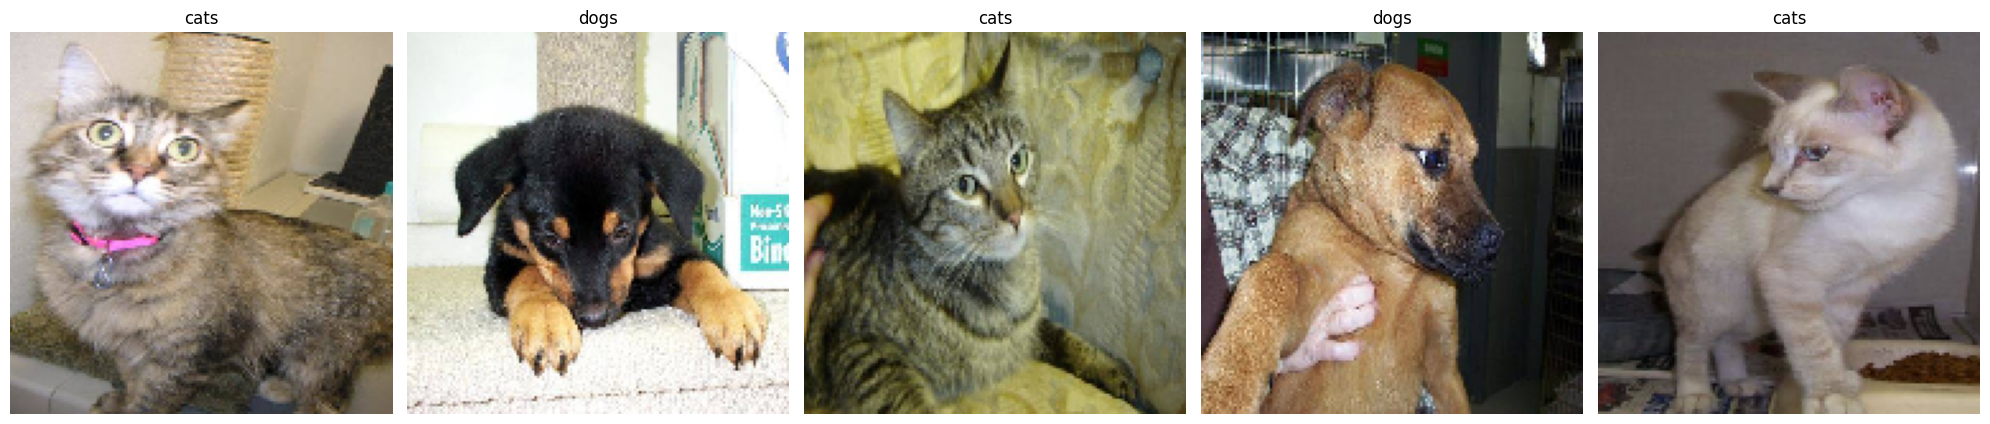

In [ ]:
import matplotlib.pyplot as plt

def plot_images_from_generator(generator, num_images):
    images, labels = next(generator)

    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_images_from_generator(train_generator, 5)

In [ ]:
train_generator.reset()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

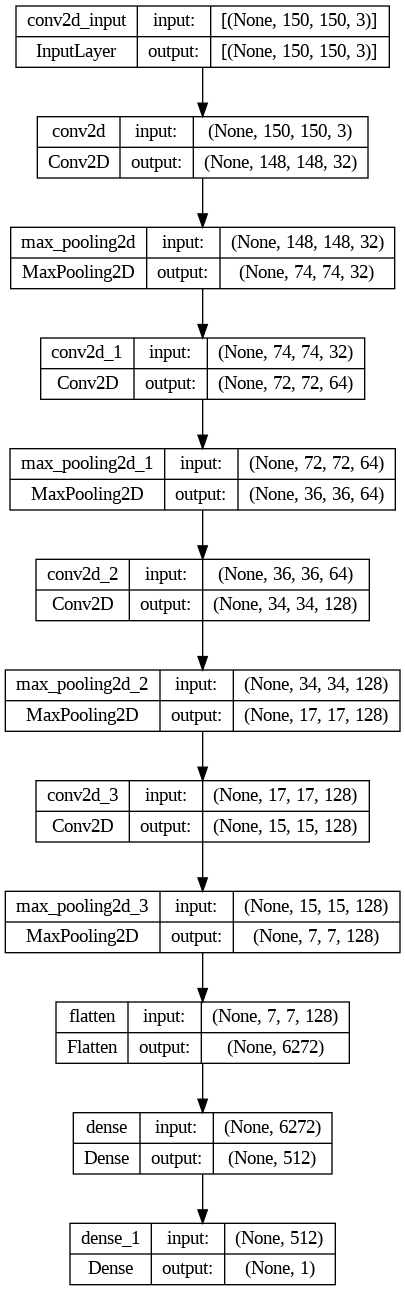

In [ ]:
plot_model(model, to_file = 'Architecture.png', show_shapes = True, show_layer_names = True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch).astype(int)
validation_steps = np.ceil(validation_generator.samples / batch).astype(int)
print(train_steps)
print(validation_steps)

800
200


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/10
800/800 [==============================] - 45s 48ms/step - loss: 0.6609 - accuracy: 0.5855 - val_loss: 0.5788 - val_accuracy: 0.6970
Epoch 2/10
800/800 [==============================] - 39s 48ms/step - loss: 0.5435 - accuracy: 0.7240 - val_loss: 0.4939 - val_accuracy: 0.7710
Epoch 3/10
800/800 [==============================] - 36s 44ms/step - loss: 0.4510 - accuracy: 0.7870 - val_loss: 0.4279 - val_accuracy: 0.8010
Epoch 4/10
800/800 [==============================] - 34s 43ms/step - loss: 0.3832 - accuracy: 0.8266 - val_loss: 0.4208 - val_accuracy: 0.8067
Epoch 5/10
800/800 [==============================] - 35s 44ms/step - loss: 0.3239 - accuracy: 0.8589 - val_loss: 0.3872 - val_accuracy: 0.8367
Epoch 6/10
800/800 [==============================] - 35s 43ms/step - loss: 0.2619 - accuracy: 0.8878 - val_loss: 0.3846 - val_accuracy: 0.8375
Epoch 7/10
800/800 [==============================] - 34s 43ms/step - loss: 0.1970 - accuracy: 0.9181 - val_loss: 0.4299 - val_accuracy:

In [ ]:
history.history

{'loss': [0.6608849763870239,
  0.5435202717781067,
  0.4509561359882355,
  0.3831750154495239,
  0.32389572262763977,
  0.26189136505126953,
  0.19704493880271912,
  0.13865633308887482,
  0.104302316904068,
  0.06047667935490608],
 'accuracy': [0.5855000019073486,
  0.7239999771118164,
  0.7870000004768372,
  0.8265625238418579,
  0.8588749766349792,
  0.8877500295639038,
  0.9180625081062317,
  0.9470624923706055,
  0.9616875052452087,
  0.9780625104904175],
 'val_loss': [0.578767716884613,
  0.4938744902610779,
  0.4278736412525177,
  0.4207514226436615,
  0.38722750544548035,
  0.3846469819545746,
  0.42989757657051086,
  0.4985833466053009,
  0.4816998839378357,
  0.7324637770652771],
 'val_accuracy': [0.6970000267028809,
  0.7710000276565552,
  0.8009999990463257,
  0.8067499995231628,
  0.8367499709129333,
  0.8374999761581421,
  0.846750020980835,
  0.8460000157356262,
  0.8460000157356262,
  0.8477500081062317]}

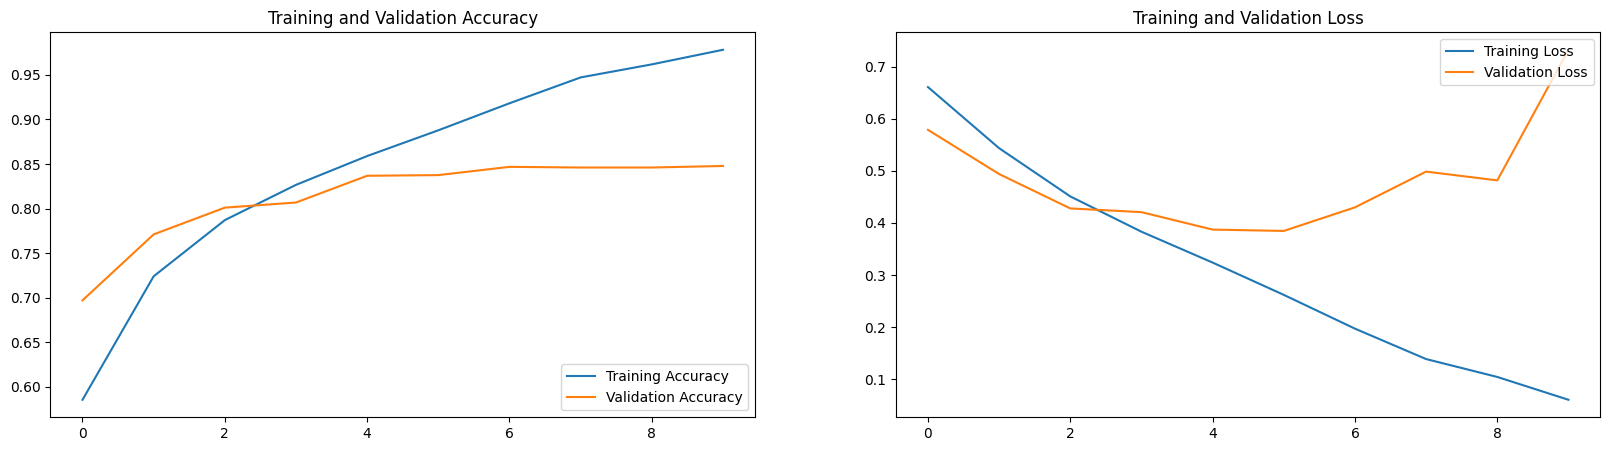

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = '/content/dogs_vs_cats/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False)

Found 5000 images belonging to 2 classes.


In [ ]:
np.ceil(test_generator.samples / test_generator.batch_size)

250.0

In [ ]:
probabilities = model.predict(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size))
probabilities

250/250 [==============================] - 9s 34ms/step


array([[6.8925962e-20],
       [9.1526653e-10],
       [2.5959011e-07],
       ...,
       [9.9999988e-01],
       [1.2066039e-02],
       [2.8653598e-01]], dtype=float32)

In [ ]:
test_generator.reset()

In [ ]:
true_classes = test_generator.classes

probabilities = model.predict(test_generator,steps = np.ceil(test_generator.samples / test_generator.batch_size))

predicted_classes = (probabilities > 0.5).astype(int).squeeze()

class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 8s 31ms/step


array([0, 0, 0, ..., 1, 0, 0])

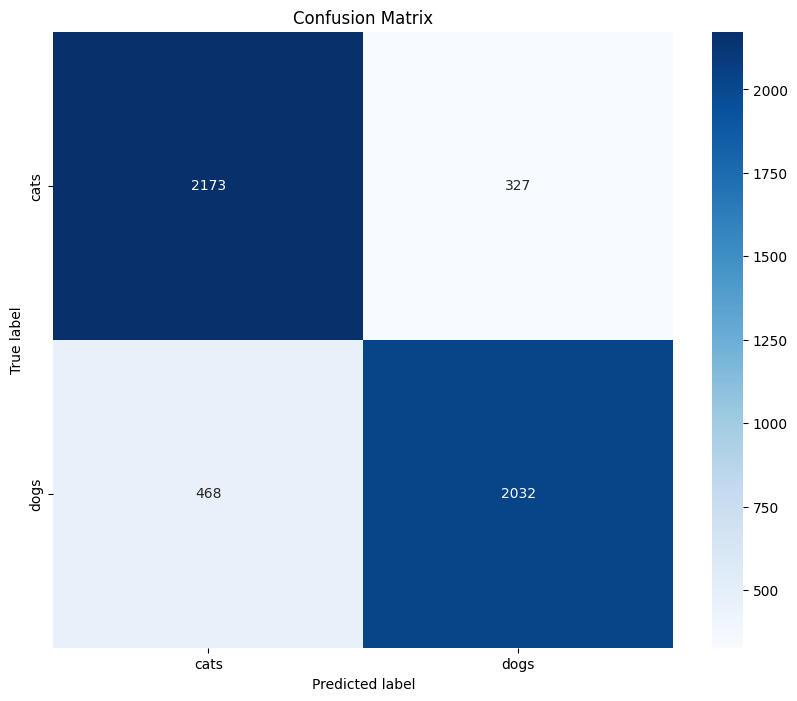

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

250/250 [==============================] - 8s 31ms/step - loss: 0.7225 - accuracy: 0.8410
Test Loss: 0.7225378155708313
Test Accuracy: 0.8410000205039978


In [ ]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 449ms/step
Prediction: [[1.]]


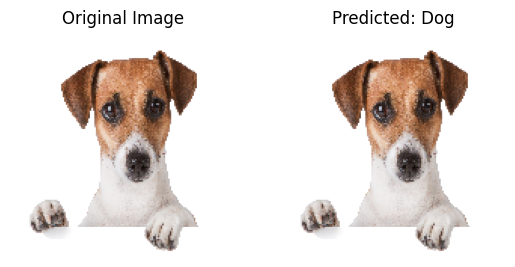

In [ ]:
img_path = '/content/R.png'
make_prediction(img_path)

In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, verbose = 1)

predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassified_indices)
print(f"Total misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

250/250 [==============================] - 8s 33ms/step
Total misclassifications in the test set: 795 out of 5000


250/250 [==============================] - 12s 46ms/step
Total misclassifications: 795


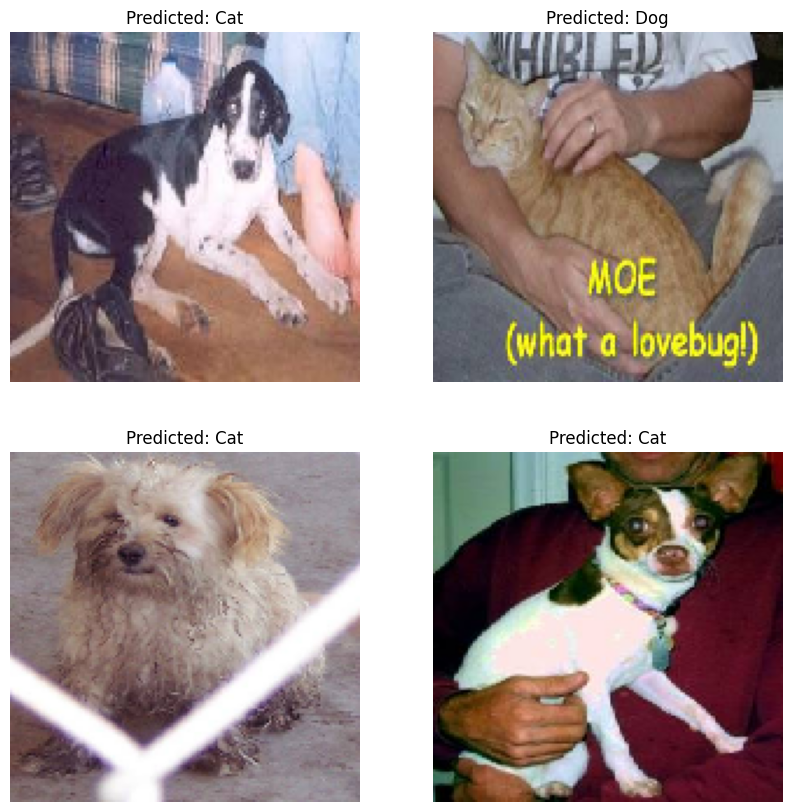

In [ ]:
# Generate predictions for all test images
predictions = model.predict(test_generator)
# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames
# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassified_indices)}")


# Select a random subset of misclassified images
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Dog" if predicted_classes[index] else "Cat"

    # Display
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

In [ ]:
for i in range(len(model.layers)):
    print(i, model.layers[i].name)
    if "conv" not in model.layers[i].name:
      continue
    filters, biases = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name, filters.shape)

0 conv2d
layer number 0 conv2d (3, 3, 3, 32)
1 max_pooling2d
2 conv2d_1
layer number 2 conv2d_1 (3, 3, 32, 64)
3 max_pooling2d_1
4 conv2d_2
layer number 4 conv2d_2 (3, 3, 64, 128)
5 max_pooling2d_2
6 conv2d_3
layer number 6 conv2d_3 (3, 3, 128, 128)
7 max_pooling2d_3
8 flatten
9 dense
10 dense_1


In [ ]:
filters , bias = model.layers[2].get_weights()
filters.shape, bias.shape

((3, 3, 32, 64), (64,))

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

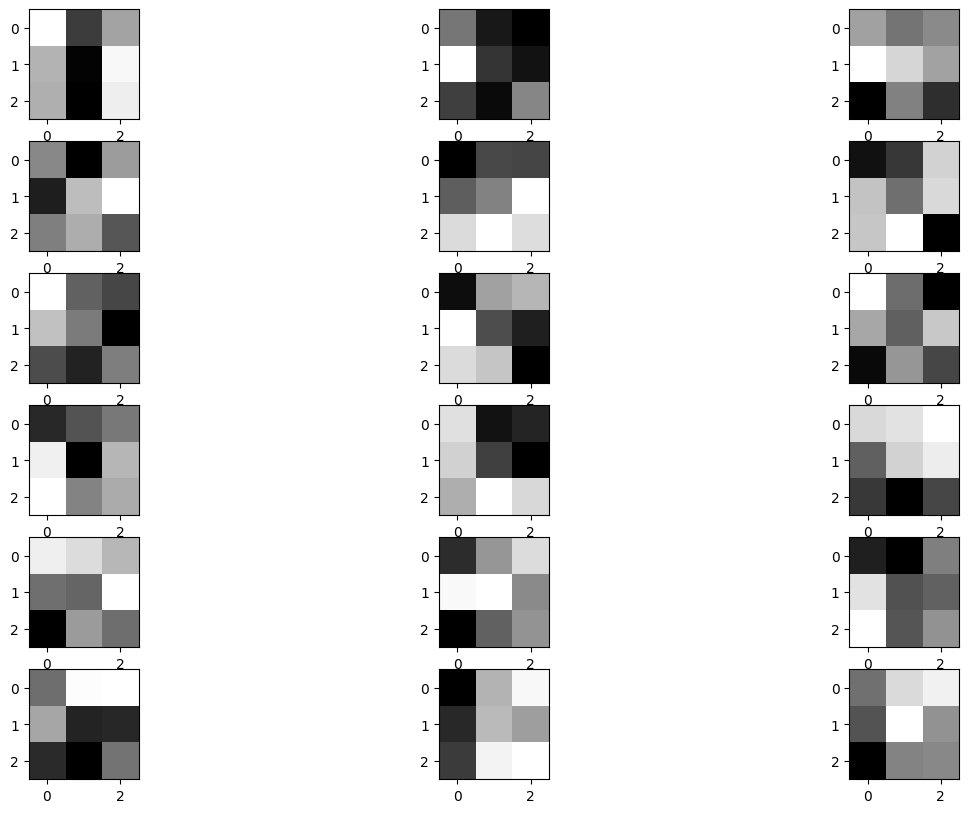

In [ ]:
n_filters=6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

1/1 [==============================] - 0s 136ms/step


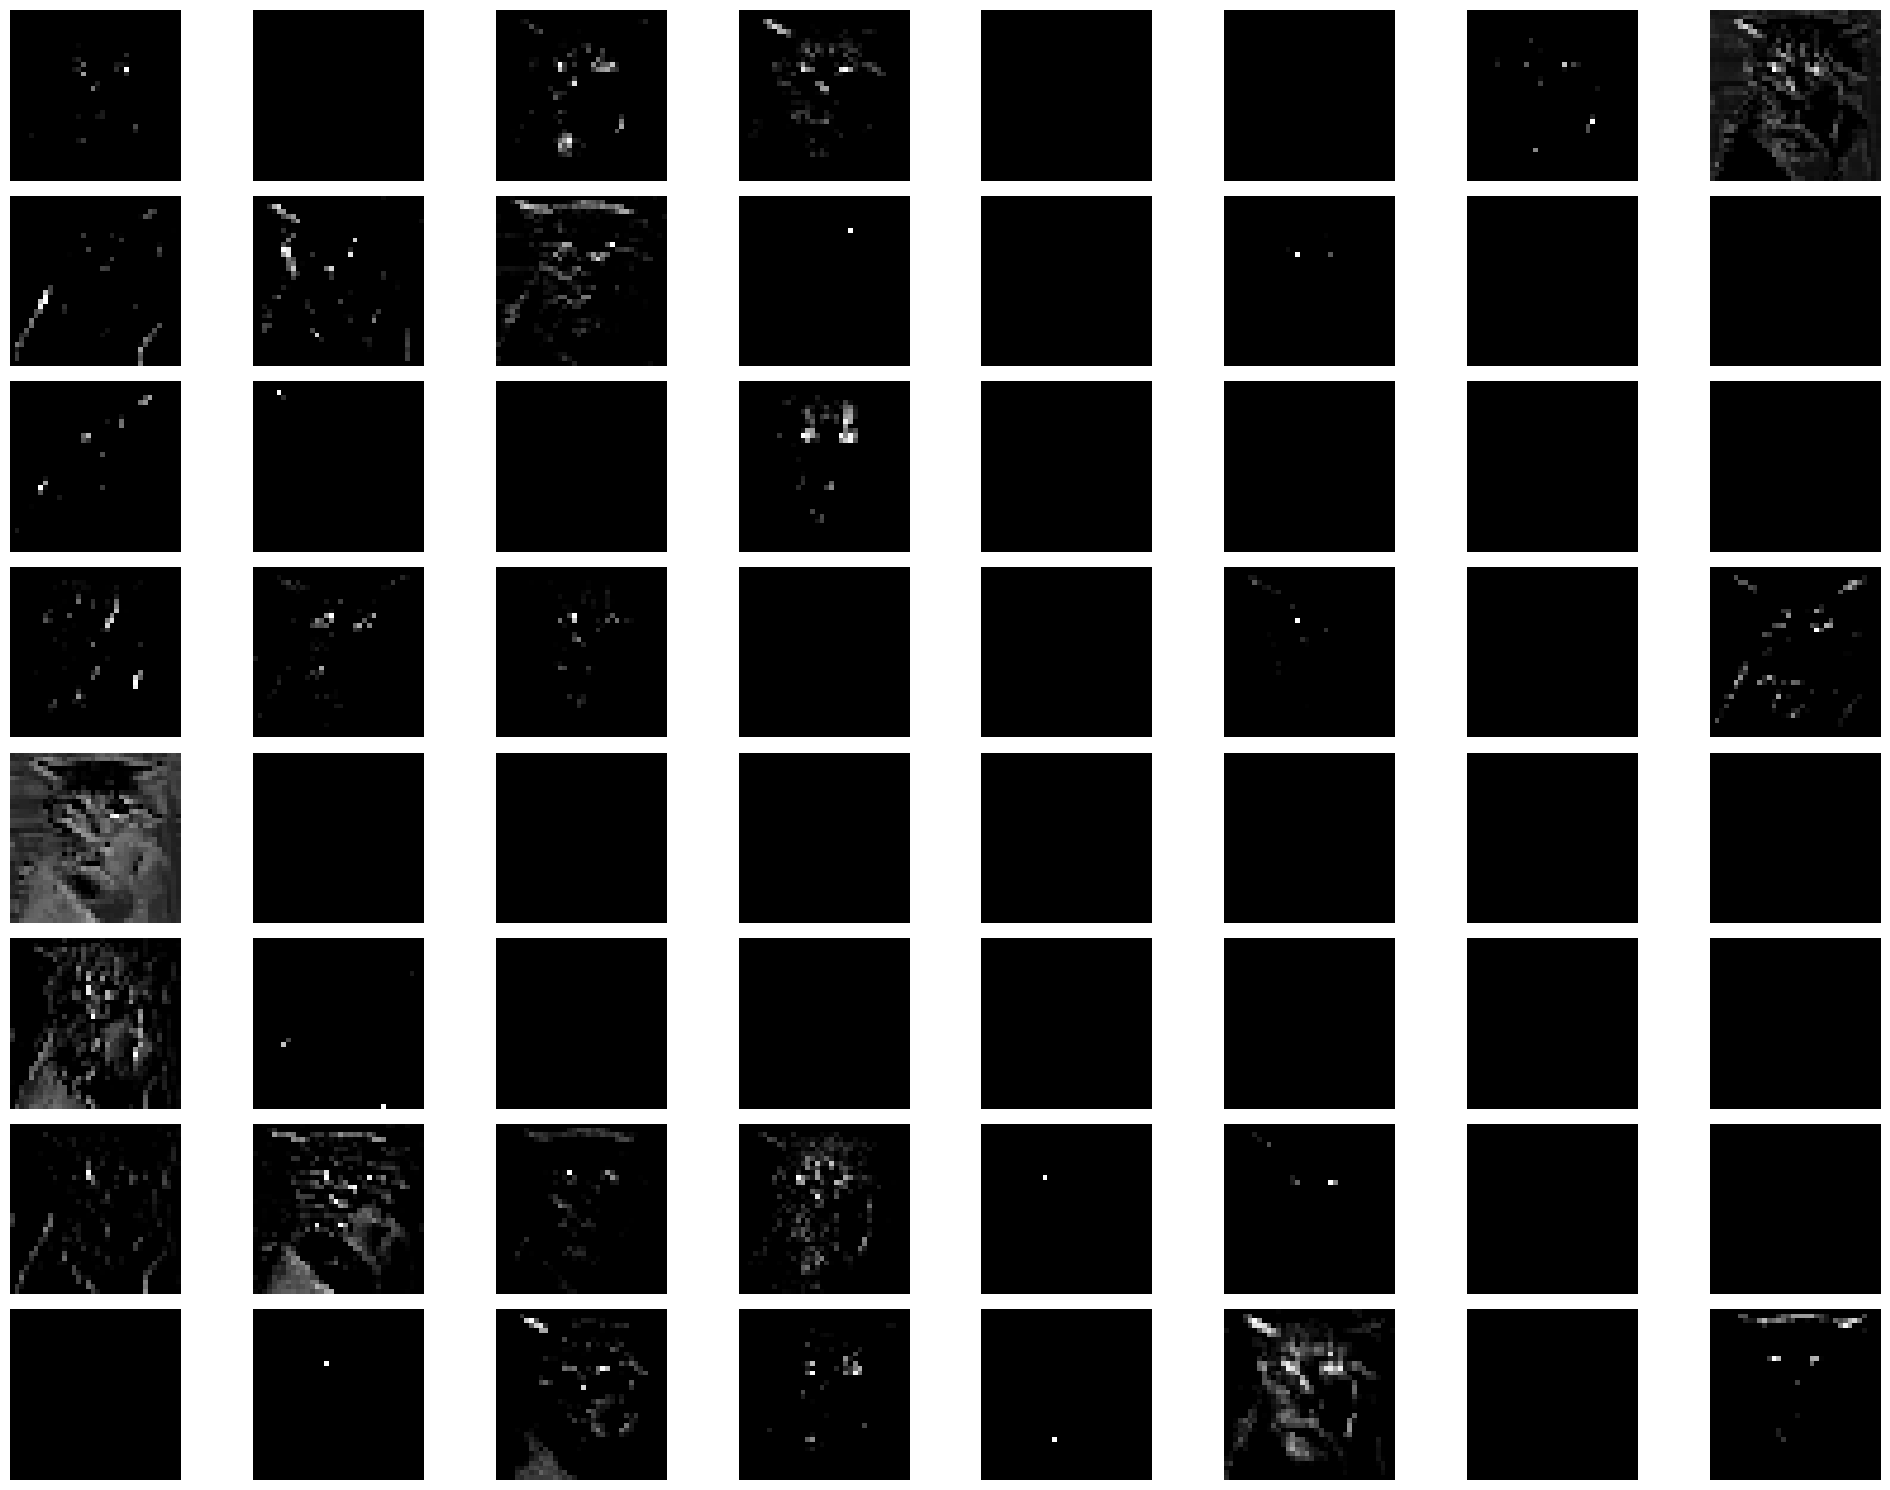

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[3].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()